<a href="https://colab.research.google.com/github/Atadewa/AchieveIT/blob/main/Week05_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D1 - Percobaan Histogram

## 1. Import Folder

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Import Library

In [68]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## 3. Membuat histogram citra

<BarContainer object of 256 artists>

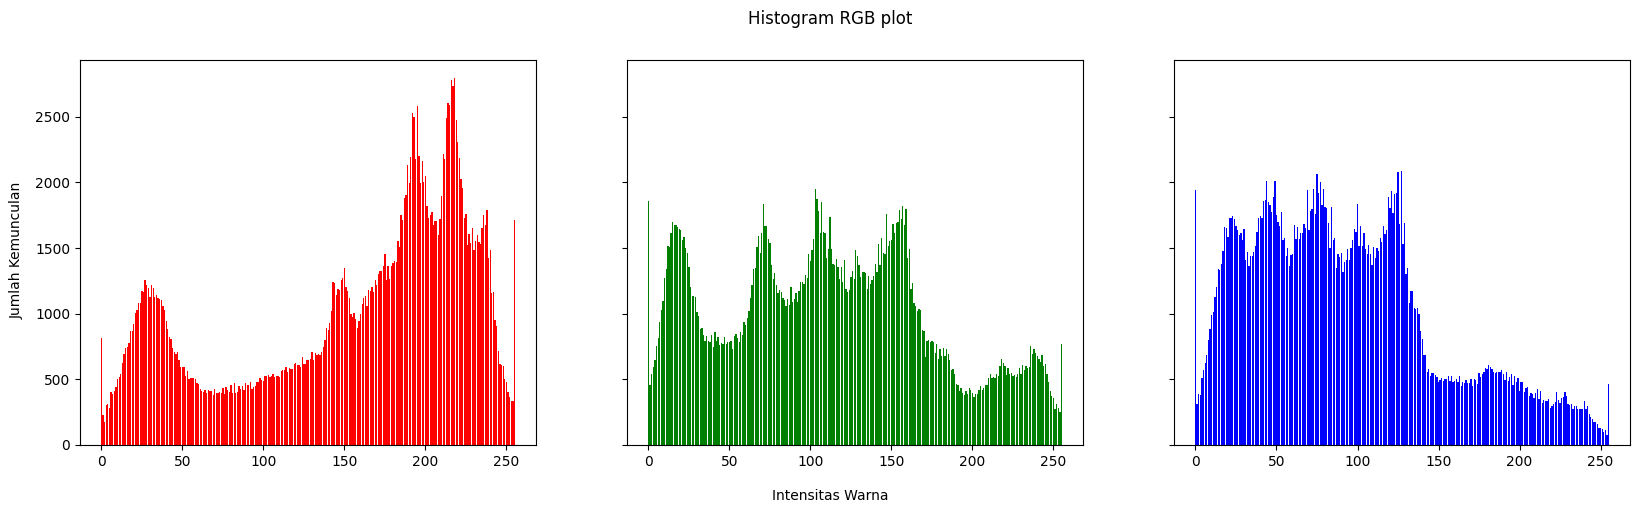

In [69]:
# membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
    for x in range(0, width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


# Pertanyaan Praktikum D1

## Soal 1

Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

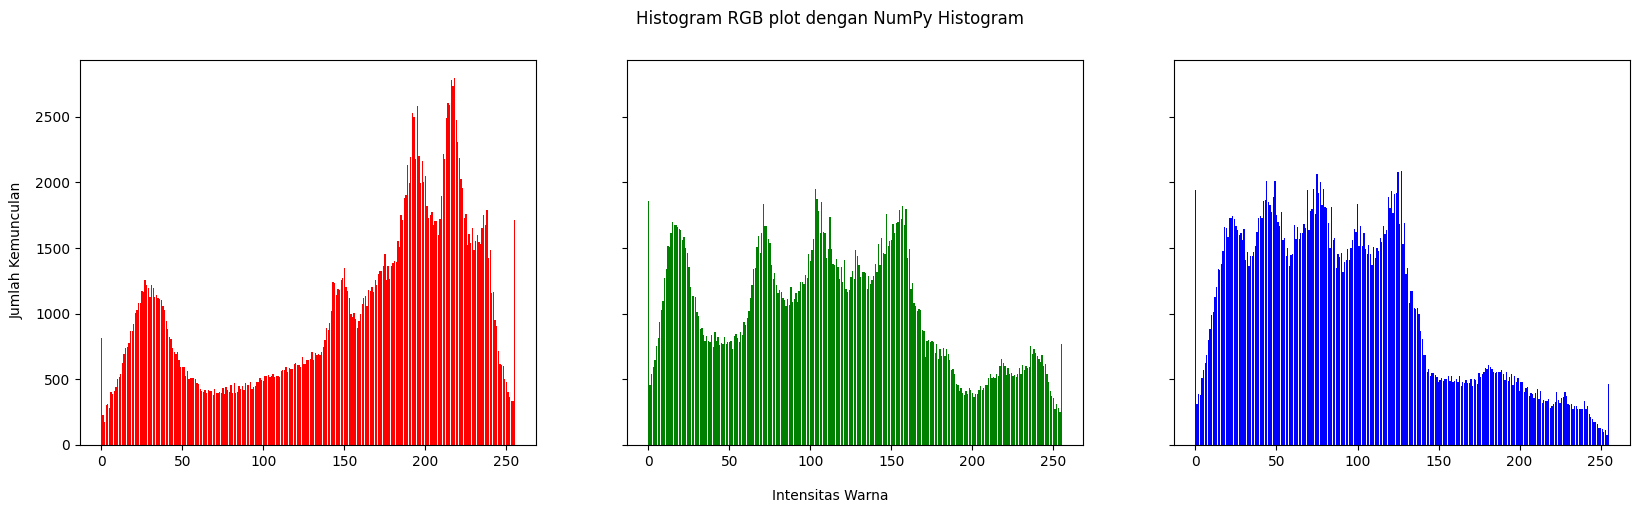

In [70]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Histogram dengan NumPy
hist_red, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
hist_blue, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot dengan NumPy Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_red, color='red')
axs[1].bar(names, hist_green, color='green')
axs[2].bar(names, hist_blue, color='blue')
plt.show()

**Jawaban:**  
- Bentuk grafik dan jumlah frekuensi yang dihasilkan oleh `np.histogram` sama dengan metode manual.
- Keunggulan dari `np.histogram` adalah prosesnya jauh lebih cepat dan sederhana, karena tidak memerlukan perulangan (loop) secara manual.

## Soal 2

Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung gelap, terang, atau kontras rendah.

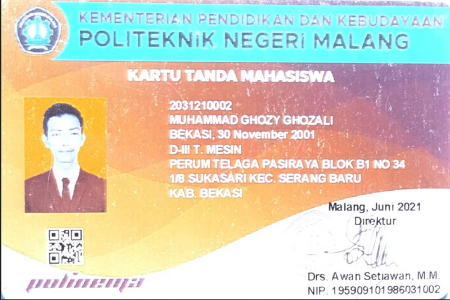

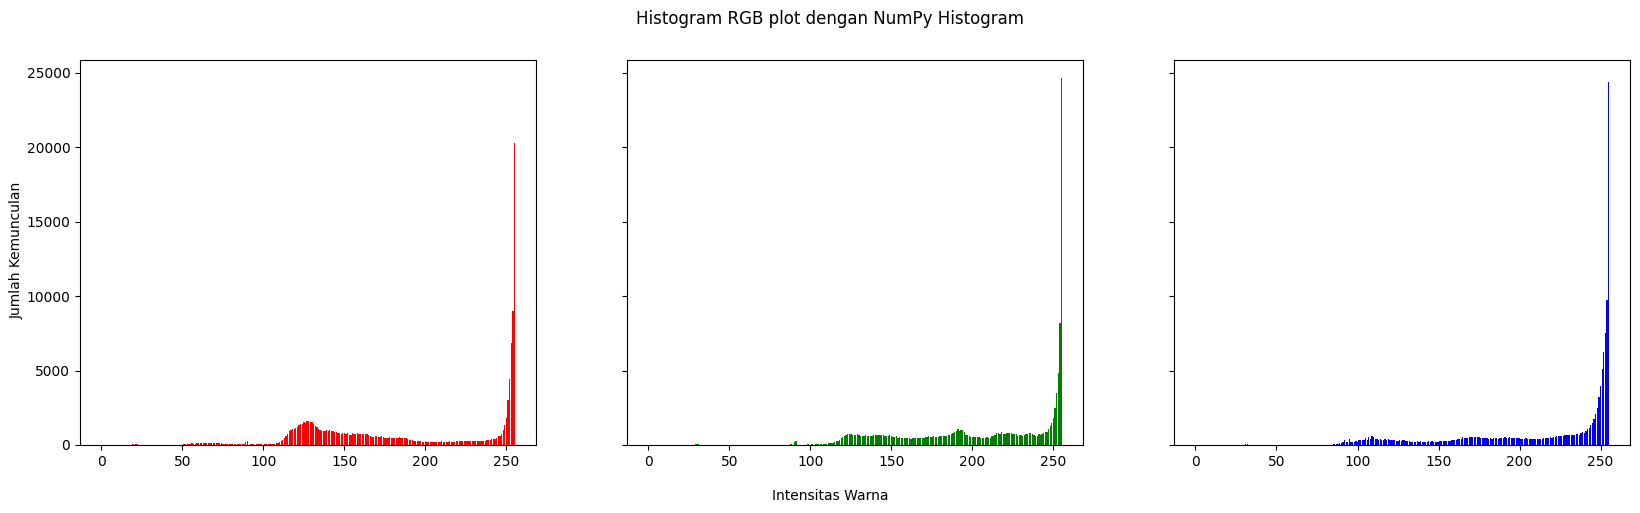

In [71]:
img2 = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/KTM_lama.jpg')
ktm2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
ktm = cv.resize(ktm2, (450, 300))
cv2_imshow(ktm)

# Histogram dengan NumPy
hist_red, _ = np.histogram(ktm[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(ktm[:, :, 1], bins=256, range=(0, 256))
hist_blue, _ = np.histogram(ktm[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot dengan NumPy Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_red, color='red')
axs[1].bar(names, hist_green, color='green')
axs[2].bar(names, hist_blue, color='blue')
plt.show()

**Analisis gambar KTM lama.jpg:**

Berdasarkan histogram, distribusi intensitas gambar KTM lama.jpg didominasi pada intensitas tinggi (mendekati 255). Hal ini menunjukkan bahwa gambar cenderung terang dengan kontras yang relatif rendah.

# D2 - Percobaan Histogram Equalization

## 1. Membuat Histogram Equalization

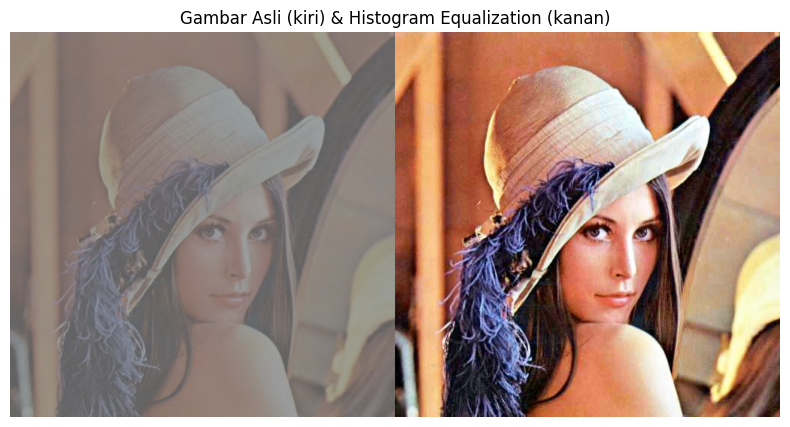

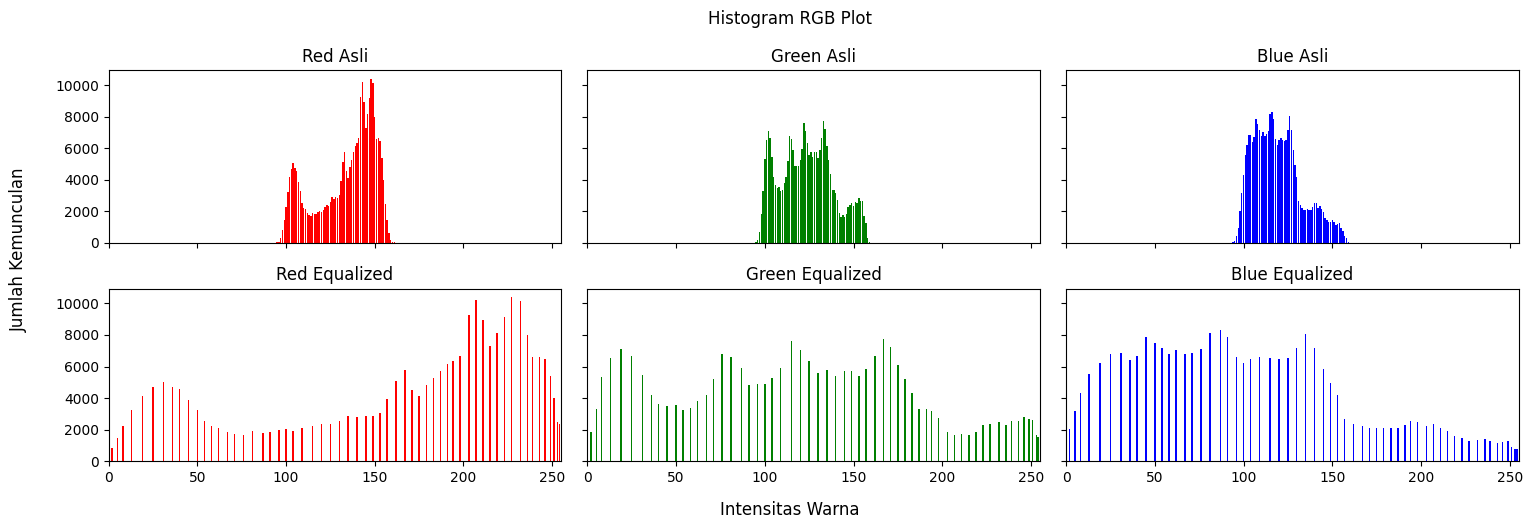

In [72]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Fungsi untuk hitung histogram per channel
def histog(img):
    h, w, c = img.shape
    hist = np.zeros((3,256), dtype=int)
    for y in range(h):
        for x in range(w):
            r, g, b = img[y, x]
            hist[0, r] += 1
            hist[1, g] += 1
            hist[2, b] += 1
    return hist

# Hitung histogram gambar asli
histo_asli = histog(img)

# Histogram global
img_array = img.flatten()
histogram_array = np.bincount(img_array, minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

chistogram_array = np.cumsum(histogram_array)

# Tabel pencarian pemetaan piksel
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Transformasi gambar menggunakan tabel pencarian
eq_img_array = transform_map[img_array]
eq_img = np.reshape(eq_img_array, img.shape)

# Menghitung histogram gambar setelah transformasi
equal_histo = histog(eq_img)

# Menggabungkan gambar sebelum & sesudah
final_frame = np.hstack((img, eq_img))

# Menampilkan gambar hasil transformasi
plt.figure(figsize=(10,5))
plt.imshow(final_frame)
plt.title("Gambar Asli (kiri) & Histogram Equalization (kanan)")
plt.axis('off')
plt.show()

# Plot histogram RGB sebelum/sesudah
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[15,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')

fig.text(-0.02, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)  # di kiri
fig.text(0.5, -0.03, 'Intensitas Warna', ha='center', fontsize=12)          # di bawah

# Histogram sebelum equalization
axs[0,0].bar(names, histo_asli[0], color='red')
axs[0,0].set_title('Red Asli')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,1].set_title('Green Asli')
axs[0,2].bar(names, histo_asli[2], color='blue')
axs[0,2].set_title('Blue Asli')

# Histogram setelah equalization
axs[1,0].bar(names, equal_histo[0], color='red')
axs[1,0].set_title('Red Equalized')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,1].set_title('Green Equalized')
axs[1,2].bar(names, equal_histo[2], color='blue')
axs[1,2].set_title('Blue Equalized')

for ax in axs.flat:
    ax.set_xlim([0,255])

plt.tight_layout()
plt.show()


## 2. Membuatlah histogram citra menggunakan library CV2, yaitu `equalizeHist`

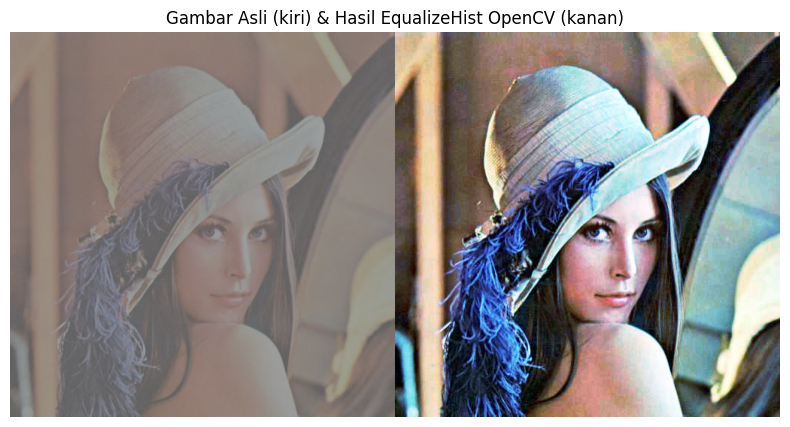

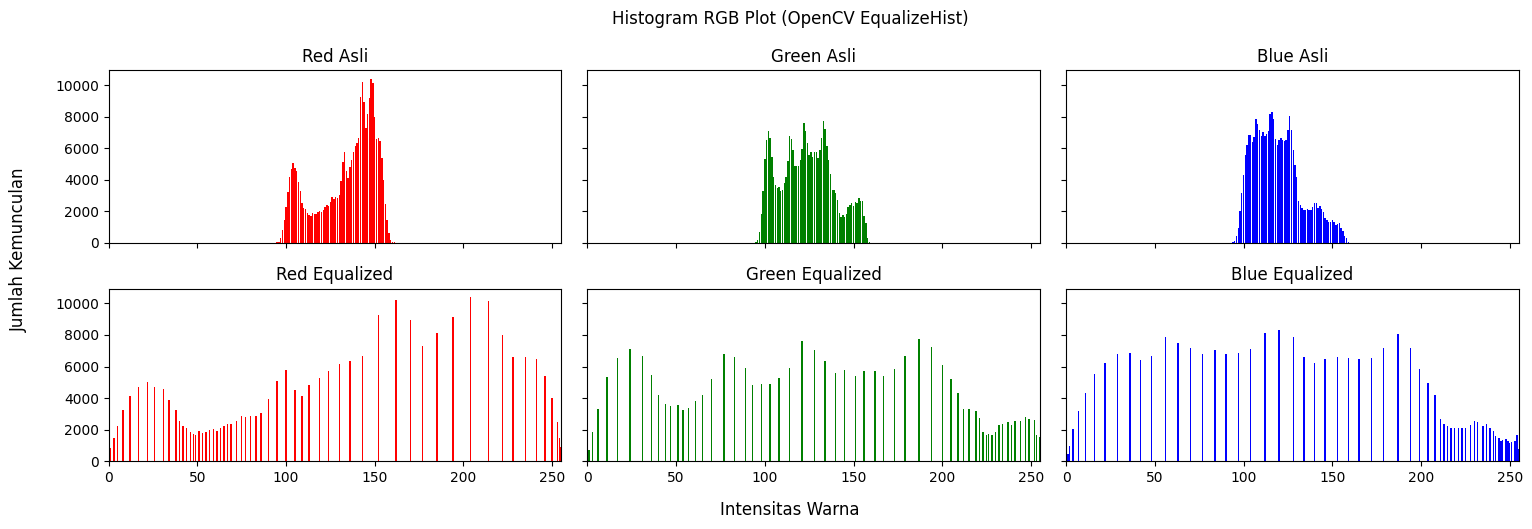

In [73]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-05/img/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

# Equalisasi masing-masing channel
r_equalized = cv.equalizeHist(r)
g_equalized = cv.equalizeHist(g)
b_equalized = cv.equalizeHist(b)

# Menggabungkan channel hasil equalized
img_equalized = cv.merge((r_equalized, g_equalized, b_equalized))

# Menggabungkan gambar asli dan equalized untuk ditampilkan
final_frame = np.hstack((img, img_equalized))

plt.figure(figsize=(10,5))
plt.imshow(final_frame)
plt.title("Gambar Asli (kiri) & Hasil EqualizeHist OpenCV (kanan)")
plt.axis('off')
plt.show()

def histog(img):
    h, w, c = img.shape
    hist = np.zeros((3,256), dtype=int)
    for y in range(h):
        for x in range(w):
            r, g, b = img[y, x]
            hist[0, r] += 1
            hist[1, g] += 1
            hist[2, b] += 1
    return hist

histo_asli = histog(img)
equal_histo = histog(img_equalized)

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[15,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot (OpenCV EqualizeHist)')

fig.text(-0.02, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, -0.03, 'Intensitas Warna', ha='center', fontsize=12)

# Histogram sebelum equalization
axs[0,0].bar(names, histo_asli[0], color='red')
axs[0,0].set_title('Red Asli')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,1].set_title('Green Asli')
axs[0,2].bar(names, histo_asli[2], color='blue')
axs[0,2].set_title('Blue Asli')

# Histogram setelah equalization OpenCV
axs[1,0].bar(names, equal_histo[0], color='red')
axs[1,0].set_title('Red Equalized')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,1].set_title('Green Equalized')
axs[1,2].bar(names, equal_histo[2], color='blue')
axs[1,2].set_title('Blue Equalized')

for ax in axs.flat:
    ax.set_xlim([0,255])

plt.tight_layout()
plt.show()


**Hasil:**

Output pada langkah 2 tidak sama persis dengan langkah 1.

Langkah 1 menghitung histogram kumulatif gabungan seluruh channel secara manual, sedangkan `cv2.equalizeHist()` pada langkah 2 melakukan equalization per channel (Red, Green, Blue), sehingga hasilnya sedikit berbeda meski tujuannya sama-sama meratakan distribusi intensitas.